https://cds.cern.ch/record/2804231/files/fphy-10-897719.pdf

https://arxiv.org/pdf/2008.05526

https://arxiv.org/pdf/1807.02441

In [1]:
! ls p8_ee_tt_ecm380/

reco_p8_ee_tt_ecm380_10.root  sim_p8_ee_tt_ecm380_10.hepmc
reco_p8_ee_tt_ecm380_1.root   sim_p8_ee_tt_ecm380_1.hepmc
reco_p8_ee_tt_ecm380_2.root   sim_p8_ee_tt_ecm380_2.hepmc
reco_p8_ee_tt_ecm380_3.root   sim_p8_ee_tt_ecm380_3.hepmc
reco_p8_ee_tt_ecm380_4.root   sim_p8_ee_tt_ecm380_4.hepmc
reco_p8_ee_tt_ecm380_5.root   sim_p8_ee_tt_ecm380_5.hepmc
reco_p8_ee_tt_ecm380_6.root   sim_p8_ee_tt_ecm380_6.hepmc
reco_p8_ee_tt_ecm380_7.root   sim_p8_ee_tt_ecm380_7.hepmc
reco_p8_ee_tt_ecm380_8.root   sim_p8_ee_tt_ecm380_8.hepmc
reco_p8_ee_tt_ecm380_9.root   sim_p8_ee_tt_ecm380_9.hepmc


https://github.com/scikit-hep/pyhepmc

In [2]:
! pip install pyhepmc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 kB 4.2 MB/s eta 0:00:00a 0:00:01


In [3]:
! pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.7 MB/s eta 0:00:00a 0:00:01


In [2]:
import pyhepmc
import uproot
import awkward as ak
import graphviz

# hepmc file

In [3]:
hepmc_events = []
with pyhepmc.open("p8_ee_tt_ecm380/sim_p8_ee_tt_ecm380_1.hepmc") as f:
    for event in f:
        hepmc_events.append(event)

In [17]:
hepmc_events[0].vertices[0].particles_out

[GenParticle(FourVector(-2.99e-14, 3.18e-14, 190, 190), mass=0, pid=11, status=42),
 GenParticle(FourVector(0, 0, 2.67e-06, 2.67e-06), mass=0, pid=22, status=1)]

In [30]:
v_count = 0
iev = 1
for vertex in hepmc_events[iev].vertices:
    
    for p in vertex.particles_out:
        if (abs(p.pid) // 100 % 10) == 5 or (abs(p.pid) // 1000 % 10) == 5:
            print(v_count)
    
    v_count += 1
    # hepmc_events[0].vertices[0].particles_out

81
102
122
162


In [33]:
print(hepmc_events[iev].vertices[122].particles_out)
print(hepmc_events[iev].vertices[122].particles_in)

[GenParticle(FourVector(-2.66, -2.68, -5.1, 8.28), mass=5.3252, pid=-523, status=2), GenParticle(FourVector(0.18, 0.115, -0.582, 0.636), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.0283, -0.359, -0.85, 1.07), mass=0.54785, pid=221, status=2), GenParticle(FourVector(-1.32, 2.71, -4.66, 5.58), mass=0.54785, pid=221, status=2), GenParticle(FourVector(-0.709, 0.733, -0.457, 1.13), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.879, 1.08, -3.52, 3.79), mass=0.13957, pid=211, status=1), GenParticle(FourVector(1.35, 1.61, -2.56, 3.35), mass=0.49761, pid=311, status=2)]
[GenParticle(FourVector(-1.83, -2.6, -4.21, 7.13), mass=4.8, pid=5, status=71), GenParticle(FourVector(2.95, 2.84, -5.84, 7.15), mass=0.5, pid=-3, status=71), GenParticle(FourVector(-2.27, 2.91, -4.86, 6.11), mass=0, pid=21, status=71), GenParticle(FourVector(-0.176, 0.783, -1.41, 1.62), mass=0, pid=21, status=71), GenParticle(FourVector(-0.917, -0.713, -1.41, 1.83), mass=0, pid=21, status=71)]


In [8]:
len(hepmc_events[0].vertices)

141

In [12]:
b_PDGID = 5
TOP_PDGID = 6
W_PDGID = 24

In [10]:
def top_selector(event):
    """Selects top quarks in the event."""
    
    tops = [p for p in event.particles if abs(p.pid) == TOP_PDGID]
    return tops

top_selector(hepmc_events[0])

[GenParticle(FourVector(20.3, -78.7, -8.23, 190), mass=171.053, pid=6, status=22),
 GenParticle(FourVector(-20.3, 78.7, 8.6, 190), mass=171.626, pid=-6, status=22),
 GenParticle(FourVector(20.5, -78.8, -8.27, 190), mass=171.053, pid=6, status=44),
 GenParticle(FourVector(-20.2, 78.5, 8.43, 190), mass=171.626, pid=-6, status=44)]

In [11]:
def topWb_selector(event):

    """Selects top quarks that have a W and a b-quark in their children set."""
    
    tops = [p for p in event.particles if abs(p.pid) == TOP_PDGID]
    
    return_tops = []
    for top in tops:
        child_pids = []
        for child in top.children:
            child_pids += [abs(child.pid)]
        
        if (W_PDGID in child_pids) and (b_PDGID in child_pids):
            return_tops += [top]
        
    return return_tops
topWb_selector(hepmc_events[0])

[GenParticle(FourVector(20.5, -78.8, -8.27, 190), mass=171.053, pid=6, status=44),
 GenParticle(FourVector(-20.2, 78.5, 8.43, 190), mass=171.626, pid=-6, status=44)]

In [12]:
def bquark_selector(event):
    """Selects b-quarks in the event."""

    bquarks = [p for p in event.particles if abs(p.pid) == b_PDGID]

    return bquarks
bquark_selector(hepmc_events[0])

[GenParticle(FourVector(-34.4, -75.5, -22.2, 86.1), mass=4.8, pid=5, status=23),
 GenParticle(FourVector(-45.6, 21.6, -46.2, 68.6), mass=4.8, pid=-5, status=23),
 GenParticle(FourVector(-17.3, -53.1, -25.2, 61.5), mass=4.8, pid=5, status=51),
 GenParticle(FourVector(-45.6, 21.6, -46.2, 68.6), mass=4.8, pid=-5, status=71),
 GenParticle(FourVector(-18.8, -46, -23.9, 55.4), mass=4.8, pid=5, status=51),
 GenParticle(FourVector(-19.1, -46.3, -23.5, 55.6), mass=5.25859, pid=5, status=73),
 GenParticle(FourVector(-19.1, -46.3, -23.5, 55.6), mass=5.25859, pid=5, status=71),
 GenParticle(FourVector(-17.6, -43.4, -22.4, 52.1), mass=4.8, pid=5, status=52),
 GenParticle(FourVector(-17.3, -42.6, -22, 51.2), mass=4.8, pid=5, status=52)]

In [54]:
def bhadron_selector(events):

    bhadrons = []
    bhadrons_zero = []
    for event in events:
        for p in event.particles:
            if (abs(p.pid) // 100 % 10) == 5 or (abs(p.pid) // 1000 % 10) == 5:
                if p.status == 0: bhadrons_zero.append(p)
                else: bhadrons.append(p)
    return bhadrons, bhadrons_zero

bhadron_selector(hepmc_events)

([GenParticle(FourVector(-17.1, -42.3, -20.7, 50.4), mass=5.3252, pid=-523, status=2),
  GenParticle(FourVector(-41.7, 19.8, -42.3, 62.8), mass=5.3252, pid=523, status=2),
  GenParticle(FourVector(-17.1, -42.3, -20.7, 50.3), mass=5.27925, pid=-521, status=2),
  GenParticle(FourVector(-41.2, 19.6, -41.8, 62.1), mass=5.27925, pid=521, status=2),
  GenParticle(FourVector(-9.55, -11.9, -2.51, 16.4), mass=5.3252, pid=523, status=2),
  GenParticle(FourVector(-9.41, -11.8, -2.51, 16.2), mass=5.27925, pid=521, status=2),
  GenParticle(FourVector(-2.66, -2.68, -5.1, 8.28), mass=5.3252, pid=-523, status=2),
  GenParticle(FourVector(-2.6, -2.65, -5.08, 8.21), mass=5.27925, pid=-521, status=2),
  GenParticle(FourVector(-26.1, 43.6, 48.6, 70.5), mass=5.3252, pid=-513, status=2),
  GenParticle(FourVector(25, 23.2, -45, 56.7), mass=5.27925, pid=521, status=2),
  GenParticle(FourVector(-25.8, 43.1, 48.1, 69.7), mass=5.27958, pid=-511, status=2),
  GenParticle(FourVector(-48.7, 52.5, 11.4, 72.7), mass=

# rootfile

In [5]:
import numpy as np

In [6]:
fi = uproot.open("p8_ee_tt_ecm380/reco_p8_ee_tt_ecm380_1.root")
root_events = fi["events"]
root_events.keys()

['MCParticles',
 'MCParticles/MCParticles.PDG',
 'MCParticles/MCParticles.generatorStatus',
 'MCParticles/MCParticles.simulatorStatus',
 'MCParticles/MCParticles.charge',
 'MCParticles/MCParticles.time',
 'MCParticles/MCParticles.mass',
 'MCParticles/MCParticles.vertex.x',
 'MCParticles/MCParticles.vertex.y',
 'MCParticles/MCParticles.vertex.z',
 'MCParticles/MCParticles.endpoint.x',
 'MCParticles/MCParticles.endpoint.y',
 'MCParticles/MCParticles.endpoint.z',
 'MCParticles/MCParticles.momentum.x',
 'MCParticles/MCParticles.momentum.y',
 'MCParticles/MCParticles.momentum.z',
 'MCParticles/MCParticles.momentumAtEndpoint.x',
 'MCParticles/MCParticles.momentumAtEndpoint.y',
 'MCParticles/MCParticles.momentumAtEndpoint.z',
 'MCParticles/MCParticles.spin.x',
 'MCParticles/MCParticles.spin.y',
 'MCParticles/MCParticles.spin.z',
 'MCParticles/MCParticles.colorFlow.a',
 'MCParticles/MCParticles.colorFlow.b',
 'MCParticles/MCParticles.parents_begin',
 'MCParticles/MCParticles.parents_end',
 'MC

In [7]:
# for more info on the generator-level status: 
# General: https://pythia.org/latest-manual/ParticleProperties.html
# TopMC generators: https://twiki.cern.ch/twiki/bin/view/Main/MC_status_code

In [8]:
# check hepmc tops if they make sense
# cross check if the tops in the rootfile make sense for our use case (e.g.)
# see if you can match those

# b-tagging setup

(array([ 6.,  7., 12., 23., 12.,  9., 13.,  9.,  6.,  3.]),
 array([ 4. ,  5.1,  6.2,  7.3,  8.4,  9.5, 10.6, 11.7, 12.8, 13.9, 15. ]),
 <BarContainer object of 10 artists>)

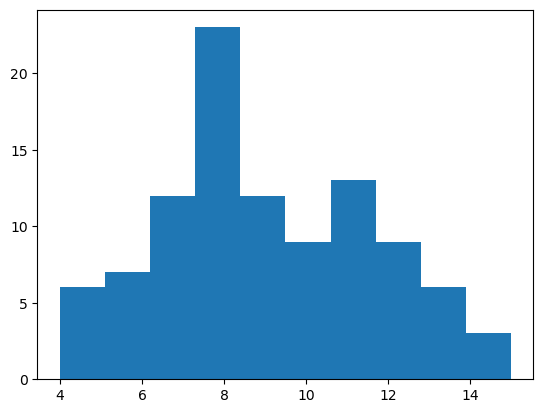

In [15]:
import matplotlib.pyplot as plt

b_PDGID = 5

is_bquark = np.absolute(root_events["MCParticles"]["MCParticles.PDG"].array()) == b_PDGID
bquarks_status = root_events["MCParticles"]["MCParticles.generatorStatus"].array()[is_bquark]

bquark_multiplicity = ak.num(bquarks_status)

plt.hist(bquark_multiplicity)

In [16]:
np.unique(ak.flatten(bquarks_status), return_counts=True)

<Array [[23, 51, 52, 71, 73], [200, 196, ..., 20]] type='2 * var * int64'>

In [17]:
is_bquark = np.absolute(root_events["MCParticles"]["MCParticles.PDG"].array())==b_PDGID
is_status23 = np.absolute(root_events["MCParticles"]["MCParticles.generatorStatus"].array())==23


root_events["MCParticles"]["MCParticles.PDG"].array()[is_bquark & is_status23]

<Array [[5, -5], [5, -5], ..., [5, -5], [5, -5]] type='100 * var * int32'>

In [18]:
root_events["MCParticles"].keys()

['MCParticles.PDG',
 'MCParticles.generatorStatus',
 'MCParticles.simulatorStatus',
 'MCParticles.charge',
 'MCParticles.time',
 'MCParticles.mass',
 'MCParticles.vertex.x',
 'MCParticles.vertex.y',
 'MCParticles.vertex.z',
 'MCParticles.endpoint.x',
 'MCParticles.endpoint.y',
 'MCParticles.endpoint.z',
 'MCParticles.momentum.x',
 'MCParticles.momentum.y',
 'MCParticles.momentum.z',
 'MCParticles.momentumAtEndpoint.x',
 'MCParticles.momentumAtEndpoint.y',
 'MCParticles.momentumAtEndpoint.z',
 'MCParticles.spin.x',
 'MCParticles.spin.y',
 'MCParticles.spin.z',
 'MCParticles.colorFlow.a',
 'MCParticles.colorFlow.b',
 'MCParticles.parents_begin',
 'MCParticles.parents_end',
 'MCParticles.daughters_begin',
 'MCParticles.daughters_end']

In [19]:
root_events["MCParticles"]["MCParticles.momentum.x"].array()[is_bquark & is_status23]

<Array [[-33.6, -44.9], [...], ..., [30, 24.2]] type='100 * var * float32'>

In [20]:
root_events["MCParticles"]["MCParticles.momentum.y"].array()[is_bquark & is_status23]

<Array [[-75.5, 21.6], [...], ..., [52.5, -74.8]] type='100 * var * float32'>

# Check current tfds format

In [26]:
import json
import math
import glob
import os
import time
import pickle as pkl
import tqdm

from pathlib import Path

import numpy as np
import torch

import sklearn
import sklearn.metrics

import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep

# import relevant functions from mlpf.pyg
import sys
sys.path.append("/home/jovyan/particleflow/mlpf/")
import pyg
sys.path.append("/home/jovyan/particleflow/mlpf/pyg/")
import utils

from PFDataset import PFDataset, Collater, InterleavedIterator
from pyg.utils import unpack_predictions, unpack_target

In [27]:
! ls /pfvol/tensorflow_datasets/clic_edm_ttbar_pf

1.5.0


In [28]:
data_dir = "/pfvol/tensorflow_datasets/"

test_list = {}

sample = "clic_edm_ttbar_pf"

split = "train"
# build dataloader for physical and gun samples seperately
dataset_test = PFDataset(
    data_dir,
    f"{sample}:1.5.0",
    split,
    num_samples=100,
)

# build dataloaders
batch_size = 10
loader = torch.utils.data.DataLoader(
    dataset_test.ds,
    batch_size=batch_size,
    collate_fn=Collater(["X", "ygen", "ycand"]),
)
test_list[sample] = []
for i, batch in enumerate(loader):
    test_list[sample] += [batch]

In [29]:
for i, batch in enumerate(test_list[sample]):
    ycand = unpack_target(batch.ygen)
    ygen = unpack_target(batch.ycand)

In [30]:
ygen.keys()

dict_keys(['cls_id', 'charge', 'pt', 'eta', 'sin_phi', 'cos_phi', 'energy', 'jet_idx', 'phi', 'momentum', 'p4'])

In [31]:
ygen["genjet_idx"].unique(return_counts=True)   # associates each track/cluster to a jet

KeyError: 'genjet_idx'

# Attempt at selecting bhadrons

Text(0.5, 0, 'num of bhadrons in an event')

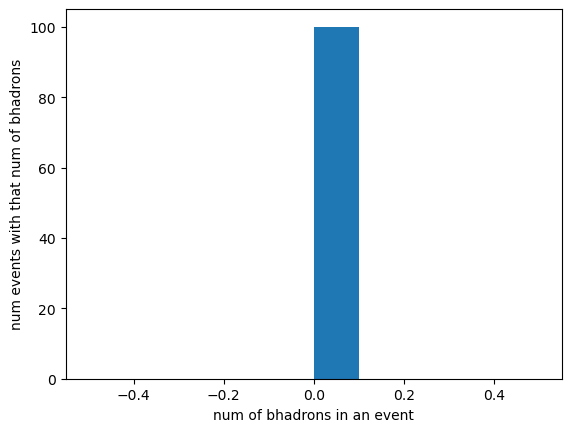

In [13]:
num_bhadrons = []
bhadrons_dict = dict()
for iev in range(100):
    mask1 = (abs(root_events["MCParticles"]["MCParticles.PDG"].array()[iev]) // 100 % 10) == 5
    mask2 = (abs(root_events["MCParticles"]["MCParticles.PDG"].array()[iev]) // 1000 % 10) == 5
    # mask3 = (root_events["MCParticles"]["MCParticles.generatorStatus"].array()[iev]) == 1
    num_bhadrons.append(len(root_events["MCParticles"]["MCParticles.PDG"].array()[iev][(mask1|mask2)&mask3]))
    for h in root_events["MCParticles"]["MCParticles.PDG"].array()[iev][(mask1|mask2)&mask3]:
        bhadrons_dict[h] = bhadrons_dict.get(h, 0)
        bhadrons_dict[h] += 1
        
import matplotlib.pyplot as plt
plt.hist(num_bhadrons, bins=10)
plt.ylabel("num events with that num of bhadrons")
plt.xlabel("num of bhadrons in an event")

(array([ 9., 25.,  0., 41.,  0., 15.,  7.,  0.,  0.,  3.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

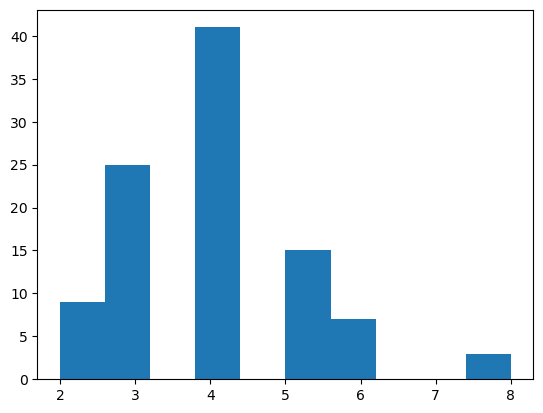

In [17]:
mask1 = (abs(root_events["MCParticles"]["MCParticles.PDG"].array()) // 100 % 10) == 5
mask2 = (abs(root_events["MCParticles"]["MCParticles.PDG"].array()) // 1000 % 10) == 5
bquarks_status = root_events["MCParticles"]["MCParticles.generatorStatus"].array()[mask1|mask2]

bquark_multiplicity = ak.num(bquarks_status)

plt.hist(bquark_multiplicity)

In [19]:
np.unique(ak.flatten(bquarks_status), return_counts = True)

<Array [[0, 2], [56, 342]] type='2 * var * int64'>

In [81]:
iev = 11
num_bhadrons = []
for iev in range(100):
    mask1 = (abs(root_events["MCParticles"]["MCParticles.PDG"].array()[iev]) // 100 % 10) == 5
    mask2 = (abs(root_events["MCParticles"]["MCParticles.PDG"].array()[iev]) // 1000 % 10) == 5
    mask3 = abs(root_events["MCParticles"]["MCParticles.generatorStatus"].array()[iev]) != 0
    # print(root_events["MCParticles"]["MCParticles.generatorStatus"].array()[iev][(mask1|mask2)&mask3])
    # print(root_events["MCParticles"]["MCParticles.PDG"].array()[iev][(mask1|mask2)&mask3])
    num_bhadrons.append(len(root_events["MCParticles"]["MCParticles.PDG"].array()[iev][(mask1|mask2)&mask3]))
from collections import Counter
counter = Counter(num_bhadrons)

In [82]:
print(counter)

Counter({4: 46, 3: 38, 2: 14, 8: 2})


In [46]:
bhadrons_dict

{-523: 27,
 523: 32,
 -521: 41,
 521: 49,
 1000260530: 1,
 1000250510: 4,
 -513: 35,
 -511: 51,
 1000260540: 4,
 513: 27,
 511: 40,
 1000260550: 1,
 1000240540: 5,
 1000250530: 5,
 5122: 3,
 1000230500: 6,
 -533: 7,
 533: 10,
 -531: 7,
 531: 10,
 1000240520: 11,
 1000250550: 1,
 1000240500: 9,
 1000220500: 2,
 1000240510: 5,
 -5122: 3,
 1000240530: 2}

<BarContainer object of 27 artists>

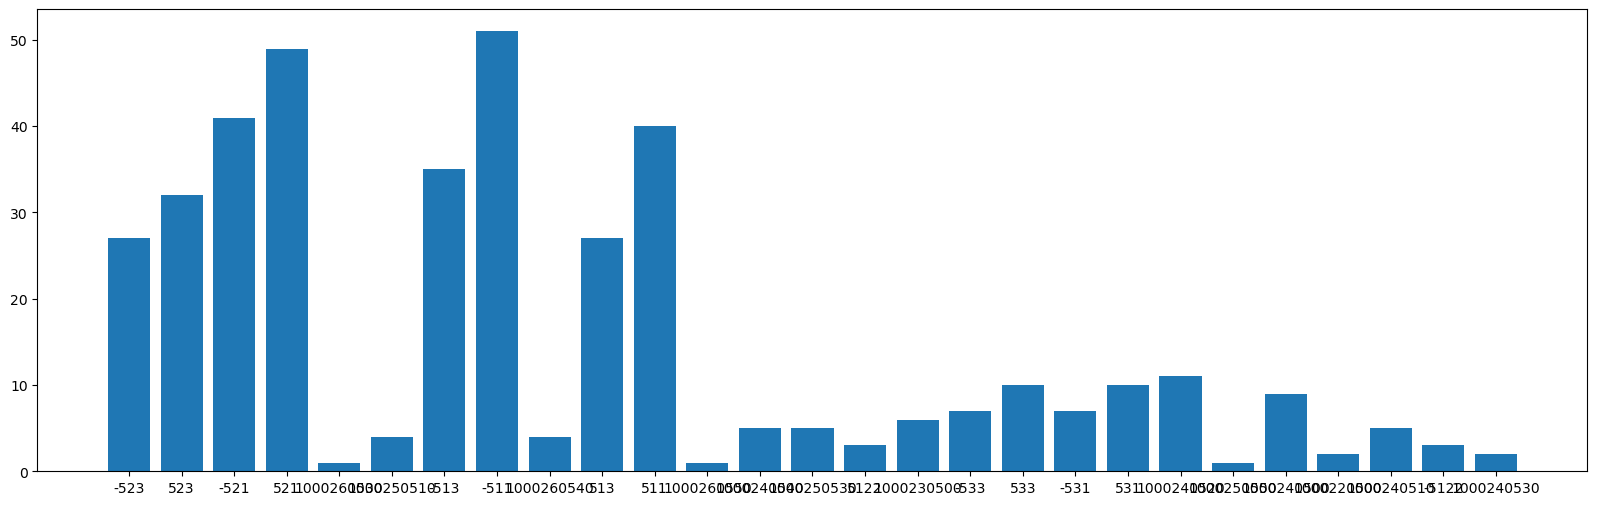

In [54]:
# Extract labels and values
labels = list(bhadrons_dict.keys())
values = list(bhadrons_dict.values())
labels = [str(label) for label in labels]
# Plot the histogram
plt.figure(figsize=(20, 6))
plt.bar(labels, values)

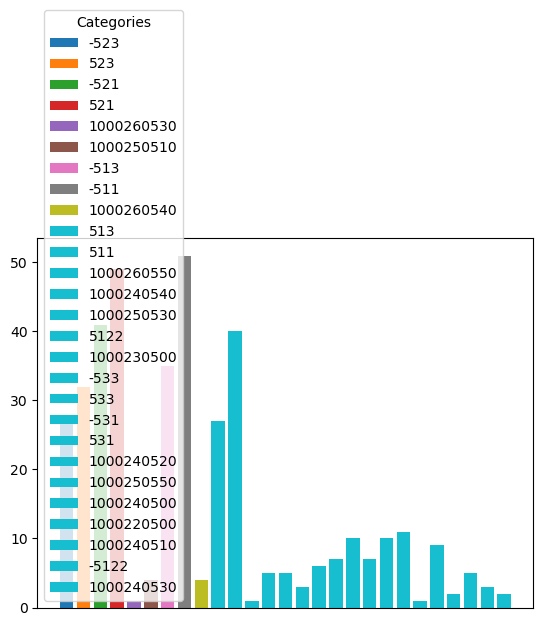

In [55]:
# Plot bars with different colors and add a legend
bars = plt.bar(range(len(labels)), values, color=plt.cm.tab10(range(len(labels))))

# Set the x-ticks to be empty since we won't use x-axis labels
plt.xticks([])  # Removes the x-axis labels

# Add legend using the category names
plt.legend(bars, labels, title='Categories')